On importe les librairie essentiels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Choix

On choisi un dataset de classification non-supervisé sur le thème de la classification de texte, pour cela nous avons choisi ce dataset :
https://www.kaggle.com/datasets/sunilthite/text-document-classification-dataset/data
Ce document comprend 2225 texte à catégoriser en 5 catégorie qui sont politique, sport, tech, amusement et business.

Ce dataset est très intéressant car il touche au domaine du NLP, la classification de texte en catégorie est très utilisé et utile par exemple : pour classifier des documents en entreprise, pour la collecte d'avis, l'analyse de sentiments, la catégorisation d'articles, et bien d'autres... 

On commence par lire le CSV.

In [2]:
df = pd.read_csv('df_file.csv')
df.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


Le dataset a une colonne label mais nous voulons être capable d'identifier des clusters sans celle-ci donc on la drop.

In [3]:
df.drop(['Label'], axis=1, inplace=True)

## EDA - Exploration du dataset

On compte le nombre d'entrée qui sont NaN

In [4]:
print(f"Number of nan values : \n {df.isna().sum()}")

Number of nan values : 
 Text    0
dtype: int64


Aucune valeur NaN a retiré, on continue..
On rajoute une colonne avec le nombre de charactère dans chaque texte et on plot pour avoir une idée de la longeur des phrases.

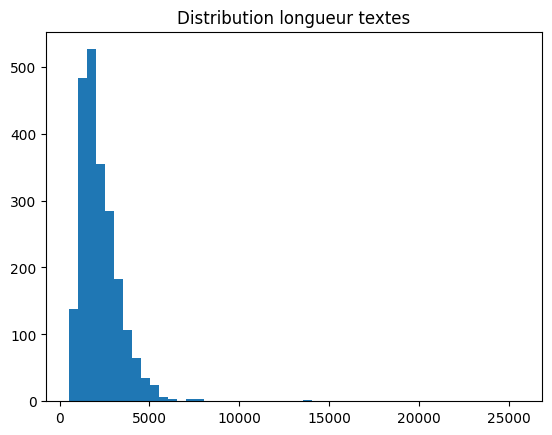

In [5]:
df['text_length'] = df['Text'].apply(len)

plt.hist(df['text_length'], bins=50)
plt.title('Distribution longueur textes')
plt.show()

## Preprocessing

Avant de transformer le texte en vecteur, nous souhaitons uniformiser le formatage du texte, pour cela on met le texte en minuscule, on retire les retour a la ligne, on retire les caractères speciaux..

In [6]:
import re
from nltk.corpus import stopwords

def preprocess_text(text):
    text = text.lower()
    text = text.replace('\n', ' ')
    text = re.sub("[^A-Za-z]+", " ", text) # on retire les caractères spéciaux
    splited = text.split()
    tokens = [w for w in splited if not w in stopwords.words("english")]
    text = " ".join(tokens)
    return text

In [7]:
df['text_cleaned'] = df['Text'].apply(lambda text: preprocess_text(text))
df = df[df['text_cleaned'] != '']

In [8]:
df.head()

,Text,text_length,text_cleaned
0,Budget to set scene for election\n \n Gordon B...,3147,budget set scene election gordon brown seek pu...
1,Army chiefs in regiments decision\n \n Militar...,3026,army chiefs regiments decision military chiefs...
2,Howard denies split over ID cards\n \n Michael...,3167,howard denies split id cards michael howard de...
3,Observers to monitor UK election\n \n Minister...,3094,observers monitor uk election ministers invite...
4,Kilroy names election seat target\n \n Ex-chat...,2614,kilroy names election seat target ex chat show...


## Transformation

On doit utiliser TfidfVectorizer pour transformers le texte en vecteur.
On utilise max_features avec une valeur de 50 pour formaliser les pharses par 50 mots les plus importants au sein des textes.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=50)
X_tfidf = tfidf_vectorizer.fit_transform(df['text_cleaned']).toarray()
print("TFIDF matrix shape :", X_tfidf.shape)


TFIDF matrix shape : (2225, 50)


On essaye d'effectuer un clustering sur les textes, on utilise pour cela Kmean avec 5 clusters en raison du nombre de catégorie textuelle que nous souhaitons faire.

In [10]:
from sklearn.cluster import KMeans

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tfidf)
df['cluster_label'] = kmeans.labels_

cluster_0 = df.loc[df['cluster_label'] == 0, 'Text'].tolist()
cluster_1 = df.loc[df['cluster_label'] == 1, 'Text'].tolist()
cluster_2 = df.loc[df['cluster_label'] == 2, 'Text'].tolist()
cluster_3 = df.loc[df['cluster_label'] == 3, 'Text'].tolist()
cluster_4 = df.loc[df['cluster_label'] == 4, 'Text'].tolist()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Il y'a 5 catégorie : politique, sport, tech, amusement et business.
On vérifie si les regroupement du cluster peuvent correspondre à ces catégories.

In [11]:
print("Cluster 0 : \n")
for i in range(10):
    print(i, cluster_0[i][:256].replace('\n', ''))

Cluster 0 : 

0 How political squabbles snowball  It's become commonplace to argue that Blair and Brown are like squabbling school kids and that they (and their supporters) need to grow up and stop bickering.  But this analysis in fact gets it wrong. It's not just chi
1 Sport betting rules in spotlight  A group of MPs and peers has called for a tightening of regulations controlling betting on sport.  The Parliamentary Group on Betting and Gaming held a substantial inquiry into betting last year. It followed fears that
2 Game warnings 'must be clearer'  Violent video games should carry larger warnings so parents can understand what their children are playing, the trade and industry secretary has said.  Patricia Hewitt is expected to call for the law banning the sale of
3 'Super union' merger plan touted  Two of Britain's big trade unions could merge to form a "super union" of two million members.  The move by Amicus and the Transport and General Workers Union (TGWU) would be a seen as a

Ces début d'articles semblent correpondre à la catégorie "sport".

In [12]:
print("Cluster 1 : \n")
for i in range(10):
    print(i, cluster_1[i][:256].replace('\n', ''))

Cluster 1 : 

0 Report attacks defence spending  The Ministry of Defence has been criticised over the soaring spending costs and growing delays of its top equipment projects.  A National Audit Office report on the 20 biggest projects says costs have risen by Â£1.7bn i
1 EU China arms ban 'to be lifted'  The EU embargo on arms exports to China is likely to be lifted in the next six months despite US objections, UK Foreign Secretary Jack Straw has said.  The 15-year-old ban was imposed in the aftermath of China's crackd
2 Brown calls for Â£5.5bn Aids fund  Gordon Brown has called on rich nations to fund a Â£5.5bn ($10bn) plan to fight the Aids epidemic and find a vaccine.  On the fourth day of his six-day tour of Africa, the UK chancellor predicted a vaccine could be fo
3 Short attacks US over tsunami aid  Former Cabinet minister Clare Short has criticised the US-led tsunami aid coalition, saying the UN should be leading efforts.  President Bush has announced that an alliance of the US, 

Ces articles semble correspondre à "business".

In [13]:
print("Cluster 2 : \n")
for i in range(10):
    print(i, cluster_2[i][:256].replace('\n', ''))

Cluster 2 : 

0 Budget to set scene for election  Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, wi
1 Army chiefs in regiments decision  Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.  A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for res
2 Howard denies split over ID cards  Michael Howard has denied his shadow cabinet was split over its decision to back controversial Labour plans to introduce ID cards.  The Tory leader said his front bench team had reached a "collective view" after holdi
3 Kilroy names election seat target  Ex-chat show host Robert Kilroy-Silk is to contest the Derbyshire seat of Erewash at the next general election.  Labour's Elizabeth Blackman won the seat in 1997 and has a 6,932 majo

Ces articles sembles correspondre à "politique".

In [14]:
print("Cluster 3 : \n")
for i in range(10):
    print(i, cluster_3[i][:256].replace('\n', ''))

Cluster 3 : 

0 BBC leads interactive Bafta wins  The BBC and the National Theatre have led the field at this year's Interactive Bafta awards.  The National Theatre's Stagework website picked up the prize for best learning as well as top factual site. The BBC collecte
1 Hollywood to sue net film pirates  The US movie industry has launched legal action to sue people who facilitate illegal film downloading.  The Motion Picture Association of America wants to stop people using the program BitTorrent to swap movies. The i
2 UK pioneers digital film network  The world's first digital cinema network will be established in the UK over the next 18 months.  The UK Film Council has awarded a contract worth Â£11.5m to Arts Alliance Digital Cinema (AADC), who will set up the netw
3 Super Size Me wins writers' award  Super Size Me director Morgan Spurlock has won the Writers Guild of America's award for documentary feature writing.  The Oscar-nominated film followed Spurlock as he ate only McDonald

Ces articles correspondent à "amusement".

In [15]:
print("Cluster 4 : \n")
for i in range(10):
    print(i, cluster_4[i][:256].replace('\n', ''))

Cluster 4 : 

0 Observers to monitor UK election  Ministers will invite international observers to check the forthcoming UK general election is fairly run.  The move comes amid claims the poll could be marred by electoral fraud. A report by two MPs committees called o
1 Research fears over Kelly's views  Scientists have expressed concerns that new education secretary Ruth Kelly's religious views could hamper vital scientific research.  Ms Kelly, who is Catholic, is reported to be "pro-life" and has opposed embryo rese
2 Hatfield executives go on trial  Engineering firm Balfour Beatty and five railway managers are to go on trial for manslaughter over the Hatfield rail crash in 2000.  Four people died when a section of rail broke and a high speed train derailed. Balfour
3 Howard unveils Tory asylum plans  Tory plans to cut immigration to the UK are not racist and will make the asylum system fairer for genuine refugees, Michael Howard has said.  As his party set out detailed asylum reform

Ces articles correspondes à la catégorie "tech".

## Reduction + Visualisation

Nous pouvons effectuer une PCA pour réduire la dimensionalité suivi d'un plot 3D pour mieux de apercevoir du résulat du clustering et ainsi voir comment les textes ont été regroupé.

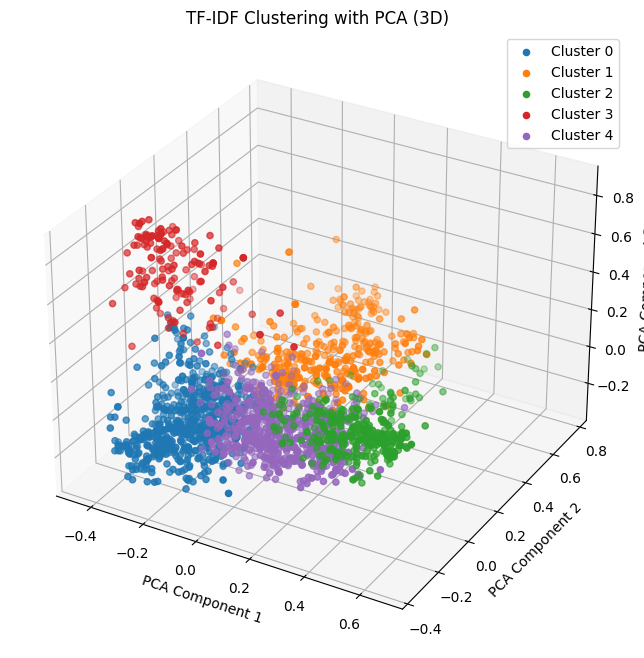

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_tfidf)

df['pca_component_1_3d'] = X_pca_3d[:, 0]
df['pca_component_2_3d'] = X_pca_3d[:, 1]
df['pca_component_3_3d'] = X_pca_3d[:, 2]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_id in range(num_clusters):
    cluster_data = df[df['cluster_label'] == cluster_id]
    ax.scatter(cluster_data['pca_component_1_3d'], cluster_data['pca_component_2_3d'], cluster_data['pca_component_3_3d'], label=f'Cluster {cluster_id}')

ax.set_title('TF-IDF Clustering with PCA (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()
plt.show()


On voit que les clusters formé sont distinct dans l'ensemble, les 5 catégorie ont bien été regroupé.